# TP Genetic Algorithm Chess Queens

> ## Réalisé Par: SOKRI Yasser - IID 2 - N°41
> ## Encadré Par: Monsieur ELKHALFI Hamza

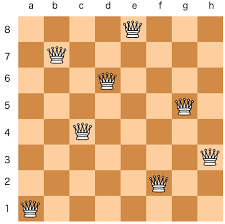

# TP - Les reines Chess:
  * ***Etape1***: Génération aléatoire d'une population
  * ***Etape2***: Calcul de la fonction Fitness
  * ***Etape3***: Selection des population en se basant sur la fitness
  * ***Etape4***: Croissement (crossover)
  * ***Etape5***: Mutation
  * ***Etape6***: Création de la fonction Croissement&Mutation, en utilisant ces deux derniers, et precisant les probabilité de croissement et de mutation
  * **Etape7**: La fonction principale pour implemnenter l'algorithme génétique

La bibliothèque NumPy:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def init_population(population_size):
  return np.random.randint(8, size=(population_size, 8))

In [3]:
init_population(8)

array([[6, 2, 7, 3, 6, 6, 5, 1],
       [2, 2, 3, 4, 0, 1, 2, 5],
       [5, 2, 0, 6, 4, 4, 4, 5],
       [6, 0, 3, 4, 6, 0, 4, 6],
       [4, 6, 4, 0, 5, 5, 0, 4],
       [7, 6, 7, 3, 1, 2, 4, 1],
       [5, 0, 1, 2, 7, 6, 0, 7],
       [5, 5, 4, 4, 3, 3, 0, 1]])

In [4]:
def fitness(population):
  valeurs_fitness = []
  for pop in population:
    penalite = 0
    for i in range(8):
      r = pop[i]
      for j in range(8):
        if i == j:
          continue
        d = abs(i - j)
        if pop[j] in [r, r-d, r+d]:
          penalite = penalite + 1
    valeurs_fitness.append(penalite)
  return -np.array(valeurs_fitness)

In [5]:
fitness(init_population(8))

array([-22, -14, -18, -16, -14, -10, -18, -24])

In [6]:
def selection(population, valeurs_fitness):
  probs = valeurs_fitness.copy()
  probs = probs + abs(probs.min()) + 1
  probs = probs/probs.sum()
  N = len(population)
  indices = np.arange(N)
  indicesSelectionne = np.random.choice(indices, size=N, p=probs)
  populationSelectionne = population[indicesSelectionne]
  return populationSelectionne

In [7]:
selection(init_population(8), fitness(init_population(8)))

array([[3, 0, 4, 4, 2, 2, 6, 4],
       [3, 0, 4, 4, 2, 2, 6, 4],
       [4, 2, 1, 3, 2, 5, 6, 6],
       [7, 4, 4, 5, 7, 0, 7, 7],
       [2, 3, 6, 7, 6, 3, 3, 4],
       [1, 0, 2, 4, 1, 4, 4, 0],
       [3, 0, 4, 4, 2, 2, 6, 4],
       [3, 0, 4, 4, 2, 2, 6, 4]])

In [8]:
def crossover(pere1, pere2, pc):
  r = np.random.random()
  if r < pc:
    m = np.random.randint(1, 8)
    enfant1 = np.concatenate([pere1[:m], pere2[m:]])
    enfant2 = np.concatenate([pere2[:m], pere1[m:]])
  else:
    enfant1 = pere1.copy()
    enfant2 = pere2.copy()
  return enfant1, enfant2


In [9]:
def mutation(individu, pm):
  r = np.random.random()
  if r < pm:
    m = np.random.randint(8)
    individu[m] = np.random.randint(8)
  return individu

In [10]:
def croissementMutation(populationSelectionne, pc, pm):
  # il faut absolument que le nombre de la population selectionnée soit paire
  N = len(populationSelectionne)
  newPopulation = np.empty((N, 8), dtype=int)
  for i in range(0, N, 2):
    pere1 = populationSelectionne[i]
    pere2 = populationSelectionne[i+1]
    enfant1, enfant2 = crossover(pere1, pere2, pc)
    newPopulation[i] = enfant1
    newPopulation[i+1] = enfant2
  for i in range(N):
    mutation(newPopulation[i], pm)
  return newPopulation

In [27]:
def main(population_size, maxGeneration, pc=0.7, pm=0.01):

  liste = []
  population = init_population(population_size)
  meilleur_fitness_global = None
  for i_gen in range(maxGeneration):
    valeurs_fitness = fitness(population)
    meilleur_i = valeurs_fitness.argmax()
    meilleur_fitness = valeurs_fitness[meilleur_i]
    if meilleur_fitness_global is None or meilleur_fitness > meilleur_fitness_global:
      meilleur_fitness_global = meilleur_fitness
      meilleur_solution = population[meilleur_i]
    liste.append(-meilleur_fitness)
    print(f'\rGeneration: {i_gen+1:06} Fitness: {-meilleur_fitness:03}') 
    if meilleur_fitness == 0:
      print('\n Solution Optimale Trouvée:')
      break
    populationSelectionne = selection(population, valeurs_fitness)
    population = croissementMutation(populationSelectionne, pc, pm)
  print()
  print(meilleur_solution)

  xx = [i for i in range(len(liste))]
  plt.plot(xx, liste)
  plt.title('Convergence Graph')
  plt.xlabel('Iteration')
  plt.ylabel('Fitness')
  plt.show()

Generation: 000001 Fitness: 004
Generation: 000002 Fitness: 002
Generation: 000003 Fitness: 002
Generation: 000004 Fitness: 004
Generation: 000005 Fitness: 002
Generation: 000006 Fitness: 002
Generation: 000007 Fitness: 004
Generation: 000008 Fitness: 002
Generation: 000009 Fitness: 002
Generation: 000010 Fitness: 002
Generation: 000011 Fitness: 002
Generation: 000012 Fitness: 000

 Solution Optimale Trouvée:

[2 5 7 0 4 6 1 3]


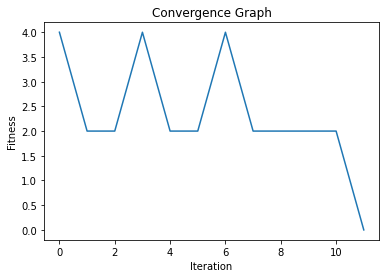

In [28]:
main(population_size=2000, maxGeneration=10000, pc=0.7, pm=0.01)

Generation: 000001 Fitness: 004
Generation: 000002 Fitness: 004
Generation: 000003 Fitness: 004
Generation: 000004 Fitness: 004
Generation: 000005 Fitness: 002
Generation: 000006 Fitness: 002
Generation: 000007 Fitness: 002
Generation: 000008 Fitness: 002
Generation: 000009 Fitness: 002
Generation: 000010 Fitness: 002
Generation: 000011 Fitness: 004
Generation: 000012 Fitness: 002
Generation: 000013 Fitness: 002
Generation: 000014 Fitness: 002
Generation: 000015 Fitness: 002
Generation: 000016 Fitness: 000

 Solution Optimale Trouvée:

[2 4 6 0 3 1 7 5]


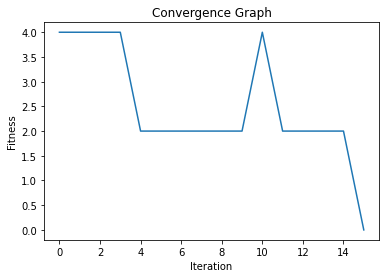

In [29]:
main(population_size=2000, maxGeneration=10000, pc=0.7, pm=0.01)

# Conclusion: 
- Finalement on a constater que les deux derniers sections montrent des convergences differents pour le problème de l'emplacement des reines, ainsi que les solutions optimales n'étaient pas les mêmes, alors nous pouvons conclure que ce problemes des reines admet plus qu'une solution optimale.